# 1. Install Dependencies and Setup

In [51]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [53]:
%pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    3.0.0
astunparse                   1.6.3
attrs                        25.1.0
certifi                      2025.1.31
cffi                         1.17.1
charset-normalizer           3.4.1
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.12
decorator                    5.2.1
exceptiongroup               1.2.2
executing                    2.2.0
flatbuffers                  25.2.10
fonttools                    4.56.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.70.0
h5py                         3.13.0
idna                         3.10
importlib_metadata           8.6.1
importlib_resources          6.5.2
ipykernel                    6.29.5
ipython                      8.18.

In [54]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [55]:
import cv2
import imghdr

In [56]:
data_dir = 'data2' 

In [57]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [58]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data2\test\fist
Issue with image data2\test\open_palm
Issue with image data2\test\thumbs_up
Issue with image data2\train\fist
Issue with image data2\train\open_palm
Issue with image data2\train\thumbs_up


# 3. Load Data

In [59]:
import numpy as np
from matplotlib import pyplot as plt

In [60]:
data = tf.keras.utils.image_dataset_from_directory('data2')

Found 1500 files belonging to 2 classes.


In [61]:
data_iterator = data.as_numpy_iterator()

In [62]:
batch = data_iterator.next()

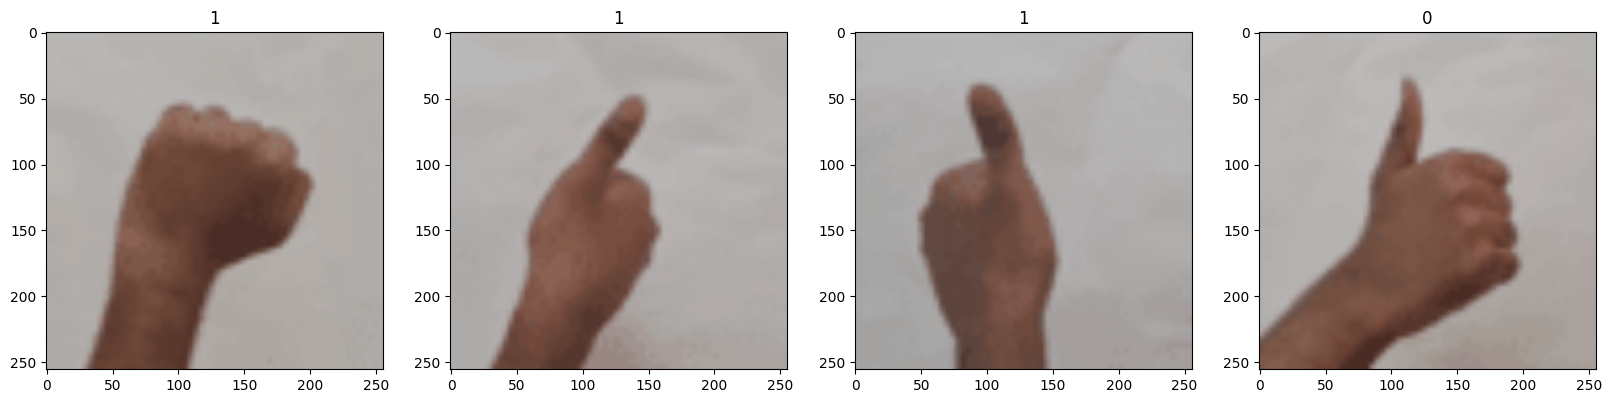

In [63]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [64]:
data = data.map(lambda x,y: (x/255, y))

In [65]:
data.as_numpy_iterator().next()

(array([[[[0.65882355, 0.6862745 , 0.6784314 ],
          [0.65882355, 0.6862745 , 0.6784314 ],
          [0.65882355, 0.6862745 , 0.6784314 ],
          ...,
          [0.66568625, 0.6931372 , 0.6818628 ],
          [0.6666667 , 0.69411767, 0.68235296],
          [0.6666667 , 0.69411767, 0.68235296]],
 
         [[0.65882355, 0.6862745 , 0.6784314 ],
          [0.65882355, 0.6862745 , 0.6784314 ],
          [0.65882355, 0.6862745 , 0.6784314 ],
          ...,
          [0.66568625, 0.6931372 , 0.6818628 ],
          [0.6666667 , 0.69411767, 0.68235296],
          [0.6666667 , 0.69411767, 0.68235296]],
 
         [[0.65882355, 0.6862745 , 0.6784314 ],
          [0.65882355, 0.6862745 , 0.6784314 ],
          [0.65882355, 0.6862745 , 0.6784314 ],
          ...,
          [0.66568625, 0.6931372 , 0.6818628 ],
          [0.6666667 , 0.69411767, 0.68235296],
          [0.6666667 , 0.69411767, 0.68235296]],
 
         ...,
 
         [[0.625     , 0.62352943, 0.60833335],
          [0.625  

# 5. Split Data

In [66]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [67]:
train_size

32

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [69]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [71]:
model = Sequential()

In [72]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [75]:
logdir='logs'

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 318ms/step - accuracy: 0.5028 - loss: 1.0029 - val_accuracy: 0.6007 - val_loss: 0.6751
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.6087 - loss: 0.6732 - val_accuracy: 0.6146 - val_loss: 0.6542
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.6183 - loss: 0.6644 - val_accuracy: 0.6250 - val_loss: 0.6533
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.6262 - loss: 0.6508 - val_accuracy: 0.6215 - val_loss: 0.6752
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.5842 - loss: 0.6858 - val_accuracy: 0.6111 - val_loss: 0.6651
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.6093 - loss: 0.6583 - val_accuracy: 0.6042 - val_loss: 0.9176
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.6229 - loss: 0.6910 - val_accuracy: 0.6389 - val_loss: 0.6298
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.6283 - loss: 0.6379 - val_accuracy: 

# 8. Plot Performance

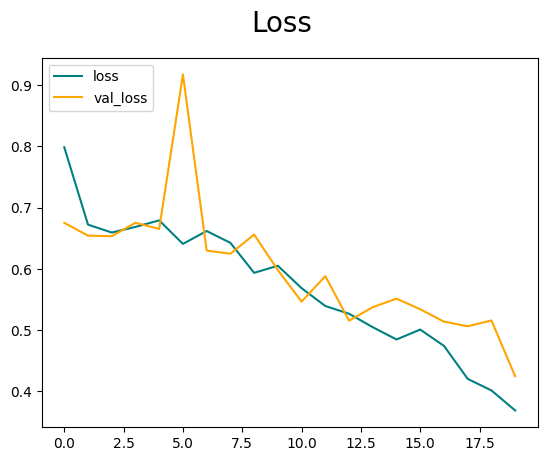

In [78]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

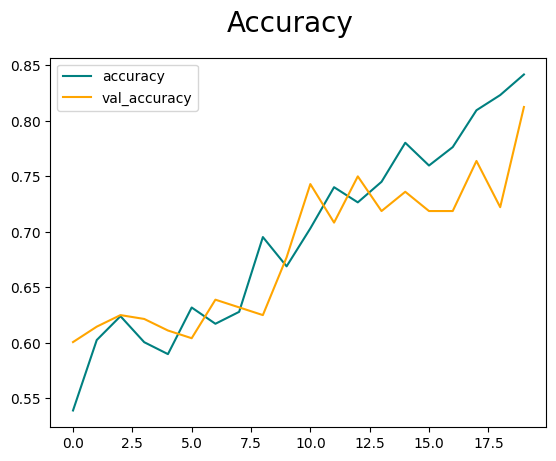

In [79]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [80]:
from keras.metrics import Precision, Recall, BinaryAccuracy


In [81]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [82]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [83]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.78313255, shape=(), dtype=float32) tf.Tensor(0.8783784, shape=(), dtype=float32) tf.Tensor(0.7890625, shape=(), dtype=float32)


# 10. Test

In [84]:
import cv2

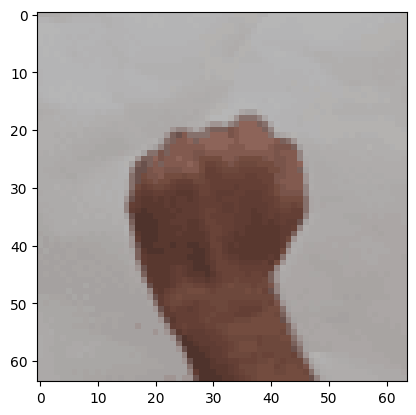

In [85]:
img = cv2.imread(r"D:\Project\HandGesture\TrainModel\models\data2\test\fist\scene00041.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

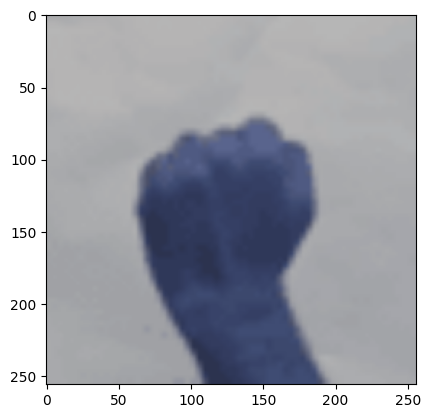

In [86]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [88]:
yhat

array([[0.3747987]], dtype=float32)

In [89]:

import numpy as np
class_names = ['fist', 'open_palm', 'thumbs_up']
predicted_class = class_names[np.argmax(yhat)]
print(f'Predicted class is {predicted_class}')


Predicted class is fist


# 11. Save the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.18.0
3.8.0


In [ ]:
model.save("my_model.keras")


In [ ]:
new_model = load_model(r"models\model2_cnn.h5")

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[0.3747987]], dtype=float32)

# 12. Test Model